# **🏏 Cricket Match Outcome Prediction using Machine Learning**

*Data Source and Preprocessing using PostgreSQL*

*Before starting this notebook, the raw match and delivery data (originally in YAML format from Cricsheet) was converted to CSV using Python. These files were then imported into a PostgreSQL database for preprocessing. Feature engineering was done using SQL to calculate powerplay runs, death overs runs, toss win impact, outcome label and head-to-head win rates. The engineered features were then exported as `match_features_train.csv` and `match_features_test.csv` and used in this notebook for model training and evaluation.*

This notebook implements and compares four machine learning models to predict the outcome of cricket matches.

The models used are:

*   Logistic Regression
*   Random Forest
*   XGBoost
*   Support Vector Machine (SVM)

## **Load and Explore Data**

In this section , the necessary datsets were accessed from Google Drive  to access pre-processed cricket match data stored in CSV format.The training and testing datasets are loaded into pandas DataFrames for further analysis. A preview of the training data is displayed to verify the structure and contents of the dataset before proceeding with data cleaning and modeling. This step ensures that the imported data aligns with the intended machine learning workflow.

In [ ]:
# Import necessary libraries for working with Google Drive and data handling
from google.colab import drive
import pandas as pd

# Connect Google Drive to access the dataset files
drive.mount('/content/drive')

# Specify the file paths for the training and testing datasets
train_path = '/content/drive/MyDrive/CricketML/match_features_train.csv'
test_path = '/content/drive/MyDrive/CricketML/match_features_test.csv'

# Read the CSV files into pandas DataFrames
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

# Display the first few rows of the training dataset to inspect the data
df_train.head(10)

Mounted at /content/drive


,match_id,date,team1,team2,venue,toss_winner,toss_decision,powerplay_runs,death_overs_runs,toss_win_helped,outcome_label,head_to_head_win_pct
0,884347,2016-03-04,South Africa,Australia,Kingsmead,Australia,bat,63,39.0,1,0,50.00
1,1147733,2018-07-14,Netherlands,United Arab Emirates,VRA Ground,United Arab Emirates,field,38,44.0,1,0,0.00
2,1179611,2019-04-02,Namibia,Botswana,United Cricket Club Ground,Botswana,bat,21,7.0,1,0,50.00
3,1144172,2019-03-19,South Africa,Sri Lanka,Newlands,South Africa,field,47,32.0,0,0,47.62
4,1213874,2020-03-04,Sri Lanka,West Indies,Pallekele International Cricket Stadium,West Indies,bat,59,46.0,0,1,52.63
5,1176796,2019-03-24,Philippines,Vanuatu,Amini Park,Vanuatu,field,37,NaN,0,1,100.00
6,1187665,2019-11-01,New Zealand,England,Hagley Oval,England,field,44,37.0,1,0,54.55
7,754797,2014-09-03,Australia,Pakistan,Kerrydale Oval,Pakistan,bat,22,18.0,1,0,62.50
8,1148061,2018-06-09,Sri Lanka,Thailand,Royal Selangor Club,Thailand,field,40,15.0,1,0,NaN
9,966739,2016-02-21,Hong Kong,United Arab Emirates,Khan Shaheb Osman Ali Stadium,Hong Kong,bat,39,20.0,0,0,NaN


In [ ]:
# Any rows with missing values are removed to maintain data consistency during training and testing
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

# The selected features represent key performance indicators and contextual match information
features = ['powerplay_runs', 'death_overs_runs', 'toss_win_helped', 'head_to_head_win_pct']

# The target variable represents the binary outcome label indicating match result
target = 'outcome_label'

# Input features and target variable are separated for the training set
X_train = df_train[features]
y_train = df_train[target]

# Input features and target variable are separated for the testing set
X_test = df_test[features]
y_test = df_test[target]

## **Preprocessing and Feature Selection**

In [ ]:
# Fill any remaining missing values in the training and testing feature sets
X_train = X_train.fillna(X_train.median(numeric_only=True))
X_test = X_test.fillna(X_train.median(numeric_only=True))


## **Model 1: Logistic Regression – Training and Evaluation**

Logistic Regression was selected as the first baseline model due to its simplicity, interpretability, and effectiveness in binary classification tasks. It is widely used for probabilistic outcome prediction and provides direct insights into the influence of input features on the target variable. Given that the task involves predicting match outcomes as a binary variable (win/loss), Logistic Regression serves as a suitable starting point for comparison with more complex models.

**1.1 Train Logistic Regression**

In [ ]:
# Import and train the Logistic Regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

**1.2 Predict Outcomes**

In [ ]:
# Predict binary outcomes (0 = Team2 Win, 1 = Team1 Win)
y_pred = model.predict(X_test)  # 0 = loss, 1 = win

# Get prediction probabilities for class 1 (Team1 Win), required for AUC and curves
y_proba = model.predict_proba(X_test)[:, 1]

**1.3 Import Metrics**

In [ ]:
# Import necessary evaluation functions
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_score,
    recall_score,
    f1_score
)

**1.4 Compute Metrics**

In [ ]:

# Calculate and store key metrics for comparison later
log_accuracy = accuracy_score(y_test, y_pred)
log_precision = precision_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_f1 = f1_score(y_test, y_pred)
log_auc = roc_auc_score(y_test, y_proba)

**1.5 Print Metrics & Confusion Matrix**

In [ ]:
# Display evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_proba))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.6786206896551724
Precision: 0.704031465093412
Recall: 0.6427289048473968
F1 Score: 0.6719849835757861
AUC Score: 0.757977890848544
Confusion Matrix:
[[760 301]
 [398 716]]


**1.6 ROC Curve**

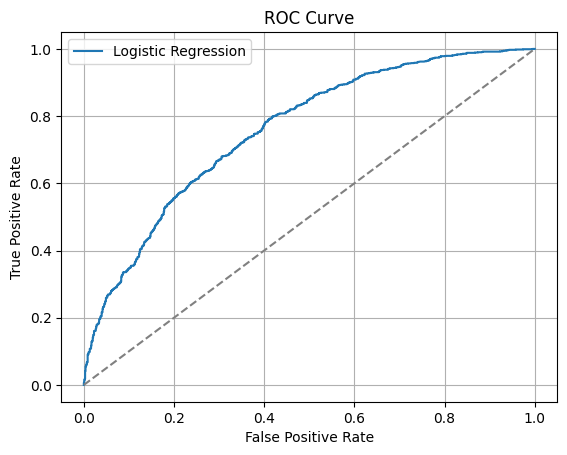

In [ ]:
# Plot the ROC curve to visualize true/false positive trade-offs
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], '--', color='gray')  # baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

**1.7 Confusion Matrix**

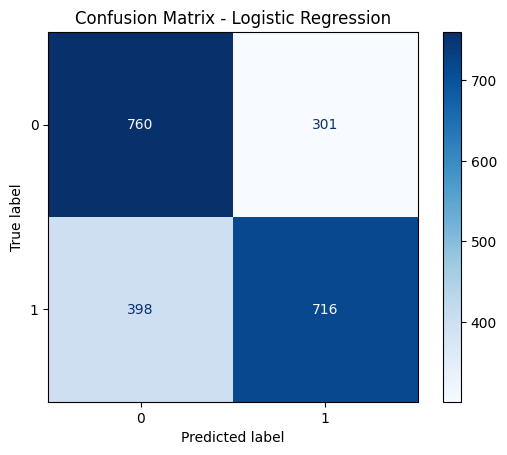

In [ ]:
# Display a styled confusion matrix with color shading
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.grid(False)
plt.show()

**1.8 Classification Report**

In [ ]:
# Generate detailed classification report (precision, recall, F1 per class)
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Team2 Win", "Team1 Win"]))

Classification Report:
              precision    recall  f1-score   support

   Team2 Win       0.66      0.72      0.68      1061
   Team1 Win       0.70      0.64      0.67      1114

    accuracy                           0.68      2175
   macro avg       0.68      0.68      0.68      2175
weighted avg       0.68      0.68      0.68      2175



**1.9 Precision-Recall Curve**

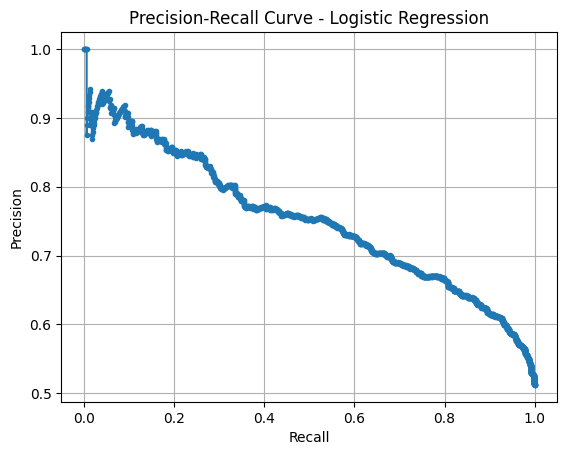

In [ ]:
# Plot Precision-Recall curve to evaluate precision at varying recall levels
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.plot(recall, precision, marker='.')
plt.title("Precision-Recall Curve - Logistic Regression")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()

**1.10 Metrics Bar Chart**

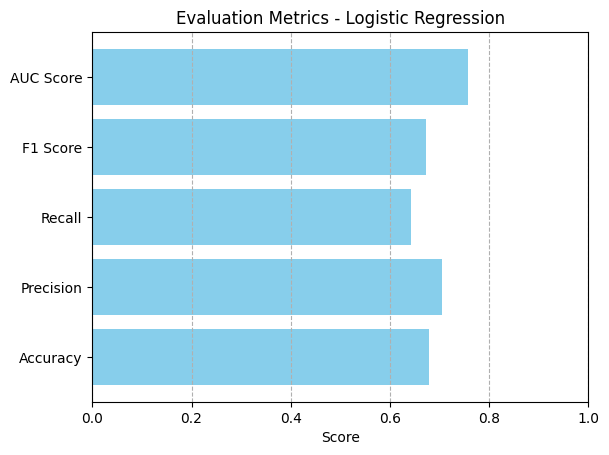

In [ ]:
# Summarize evaluation metrics using a bar chart(accuracy, precision, recall, F1, and AUC)
scores = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred),
    'AUC Score': roc_auc_score(y_test, y_proba)
}

plt.barh(list(scores.keys()), list(scores.values()), color='skyblue')
plt.title("Evaluation Metrics - Logistic Regression")
plt.xlabel("Score")
plt.xlim(0, 1)
plt.grid(True, axis='x', linestyle='--')
plt.show()

## **Model 2: Random Forest – Training and Evaluation**

Random Forest was employed due to its robustness and ability to handle non-linear relationships and feature interactions effectively. As an ensemble learning technique based on decision trees, it reduces overfitting and improves generalization by averaging the results of multiple randomized trees. Its feature importance capability also aids in understanding which inputs most influence the prediction of match outcomes.

**2.1 Import and Setup**

In [ ]:
# Import Random Forest model and required evaluation libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve, precision_recall_curve,
    confusion_matrix, classification_report, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns

**2.2 Train the Model.**

In [ ]:
# Train the Random Forest model with 100 decision trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**2.3 Predict**

In [ ]:
# Predict binary class labels for test data
rf_pred = rf_model.predict(X_test)
# Get probability estimates for class 1 (Team1 Win)
rf_proba = rf_model.predict_proba(X_test)[:, 1]  # Probability of class 1

**2.4 Store Evaluation Metrics**

In [ ]:
# Calculate and store key metrics for Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_auc = roc_auc_score(y_test, rf_proba)

**2.5 Print Metrics & Confusion Matrix**

In [ ]:
# Print classification metrics
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print("AUC Score:", rf_auc)

# Generate and print raw confusion matrix
cm = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.6427586206896552
Precision: 0.6544454628780935
Recall: 0.6409335727109515
F1 Score: 0.6476190476190476
AUC Score: 0.7018005776874566
Confusion Matrix:
[[684 377]
 [400 714]]


**2.6 ROC Curve**

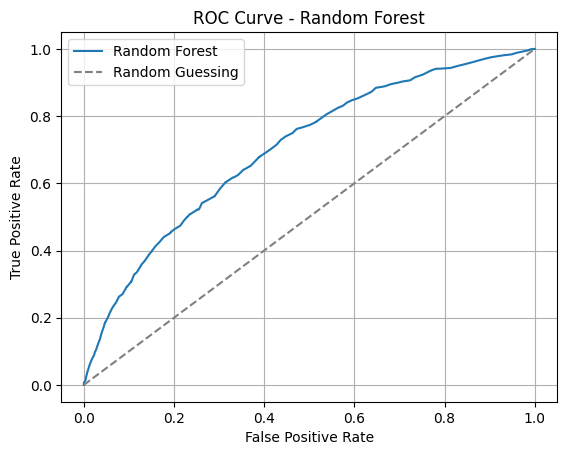

In [ ]:
# Plot ROC curve for Random Forest
fpr, tpr, _ = roc_curve(y_test, rf_proba)

plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.grid(True)
plt.show()

**2.7 Confusion Matrix**

Confusion Matrix:
 [[684 377]
 [400 714]]


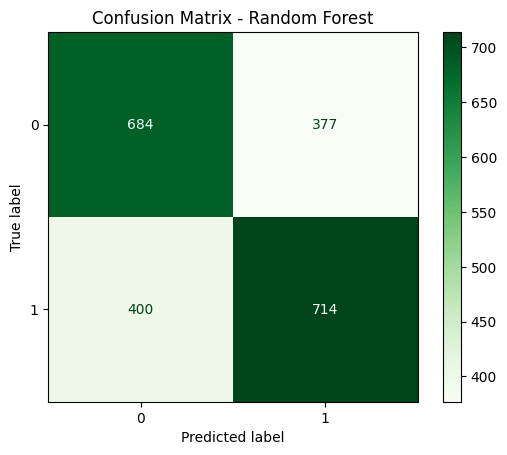

In [ ]:
# Print and plot confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
ConfusionMatrixDisplay.from_predictions(y_test, rf_pred, cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.grid(False)
plt.show()

**2.8 Classification Report**

In [ ]:
# Display detailed classification report (per class)
print("\n Classification Report:\n")
print(classification_report(y_test, rf_pred, target_names=["Team2 Win", "Team1 Win"]))


 Classification Report:

              precision    recall  f1-score   support

   Team2 Win       0.63      0.64      0.64      1061
   Team1 Win       0.65      0.64      0.65      1114

    accuracy                           0.64      2175
   macro avg       0.64      0.64      0.64      2175
weighted avg       0.64      0.64      0.64      2175



**2.9 Precision-Recall Curve**

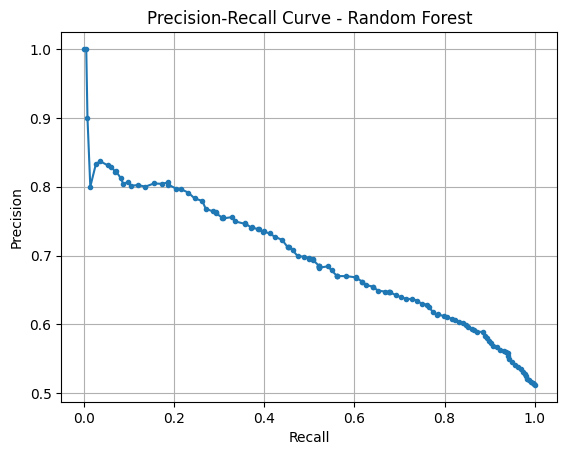

In [ ]:
# Plot Precision-Recall curve for Random Forest
precision, recall, _ = precision_recall_curve(y_test, rf_proba)

plt.plot(recall, precision, marker='.')
plt.title("Precision-Recall Curve - Random Forest")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()

**2.10 Metrics Bar Chart**

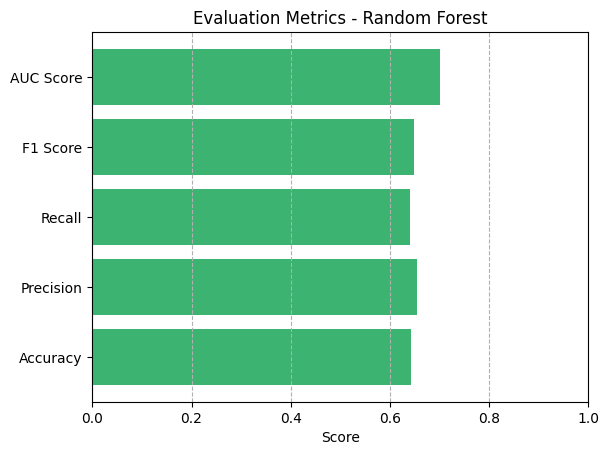

In [ ]:
# Create bar chart to summarize evaluation metrics
scores = {
    'Accuracy': accuracy_score(y_test, rf_pred),
    'Precision': precision_score(y_test, rf_pred),
    'Recall': recall_score(y_test, rf_pred),
    'F1 Score': f1_score(y_test, rf_pred),
    'AUC Score': roc_auc_score(y_test, rf_proba)
}

plt.barh(list(scores.keys()), list(scores.values()), color='mediumseagreen')
plt.title("Evaluation Metrics - Random Forest")
plt.xlabel("Score")
plt.xlim(0, 1)
plt.grid(True, axis='x', linestyle='--')
plt.show()

## **Model 3: XGBoost – Training and Evaluation**

XGBoost was selected for its proven performance in structured/tabular data and its ability to efficiently handle large datasets with high predictive accuracy. It is a gradient boosting framework known for optimizing model performance through regularization and iterative learning. Its use here is aimed at improving predictive power while minimizing bias and variance in the model.

**3.1 Install XGBoost**

In [ ]:
# Install XGBoost since not available
!pip install xgboost

**3.2 Import Libraries**

In [ ]:
# Import XGBoost classifier and necessary evaluation libraries
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve, precision_recall_curve,
    confusion_matrix, classification_report, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns

**3.3 Train the Model**

In [ ]:
#Initialize and train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:35:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

**3.4 Predict**

In [ ]:
# Predict class labels and compute probability estimates
xgb_pred = xgb_model.predict(X_test)
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]  # Class 1 probability

**3.5 Store Evaluation Metrics**

In [ ]:
# Calculate and store key metrics for XGBoost
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)
xgb_auc = roc_auc_score(y_test, xgb_proba)

**3.6 Print Metrics and Raw Confusion Matrix**

In [ ]:
# Print all evaluation scores
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("Precision:", precision_score(y_test, xgb_pred))
print("Recall:", recall_score(y_test, xgb_pred))
print("F1 Score:", f1_score(y_test, xgb_pred))
print("AUC Score:", roc_auc_score(y_test, xgb_proba))

# Generate and print confusion matrix values
cm = confusion_matrix(y_test, xgb_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.6271264367816092
Precision: 0.6358744394618834
Recall: 0.6364452423698385
F1 Score: 0.636159712875729
AUC Score: 0.6799858539334018
Confusion Matrix:
[[655 406]
 [405 709]]


**3.7 ROC Curve**

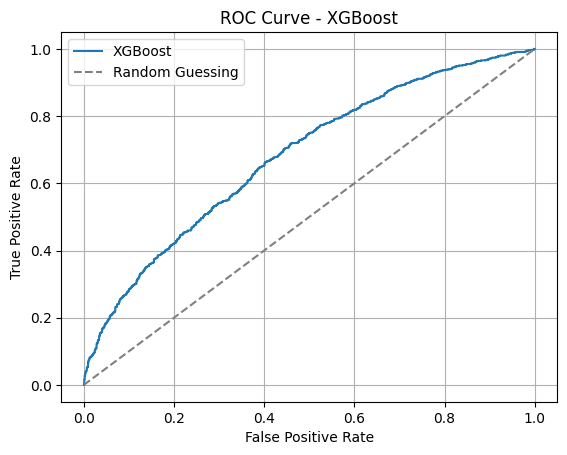

In [ ]:
# Plot ROC curve for XGBoost
fpr, tpr, _ = roc_curve(y_test, xgb_proba)

plt.plot(fpr, tpr, label='XGBoost')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend()
plt.grid(True)
plt.show()

**3.8 Confusion Matrix**

Confusion Matrix:
 [[655 406]
 [405 709]]


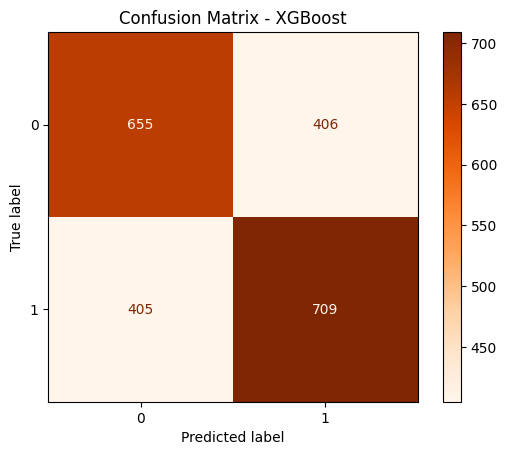

In [ ]:
# Plot color-coded confusion matrix for XGBoost
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
ConfusionMatrixDisplay.from_predictions(y_test, xgb_pred, cmap="Oranges")
plt.title("Confusion Matrix - XGBoost")
plt.grid(False)
plt.show()

**3.9 Classification Report**

In [ ]:
# Generate detailed classification report
print("\n Classification Report:\n")
print(classification_report(y_test, xgb_pred, target_names=["Team2 Win", "Team1 Win"]))


 Classification Report:

              precision    recall  f1-score   support

   Team2 Win       0.62      0.62      0.62      1061
   Team1 Win       0.64      0.64      0.64      1114

    accuracy                           0.63      2175
   macro avg       0.63      0.63      0.63      2175
weighted avg       0.63      0.63      0.63      2175



**3.10 Precision-Recall Curve**

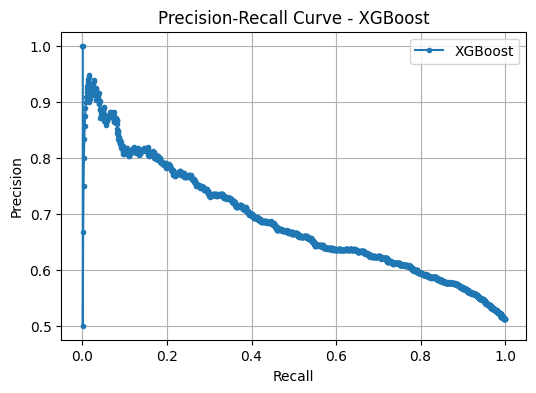

In [ ]:
from sklearn.metrics import precision_recall_curve

# Compute precision and recall values
precision, recall, _ = precision_recall_curve(y_test, xgb_proba)

# Plot only if data is valid
if len(precision) > 0 and len(recall) > 0:
    plt.figure(figsize=(6, 4))
    plt.plot(recall, precision, marker='.', label="XGBoost")
    plt.title("Precision-Recall Curve - XGBoost")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.grid(True)
    plt.legend()
    plt.show()
else:
    print("Warning: Precision or Recall arrays are empty.")

**3.11 Evaluation Metrics Bar Chart**

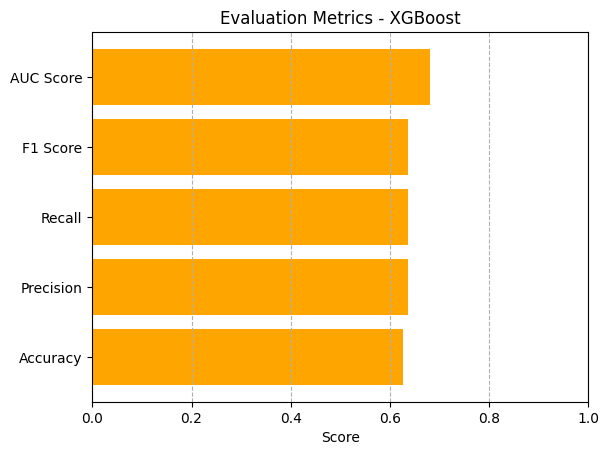

In [ ]:
# Visualize model performance using a horizontal bar chart
scores = {
    'Accuracy': accuracy_score(y_test, xgb_pred),
    'Precision': precision_score(y_test, xgb_pred),
    'Recall': recall_score(y_test, xgb_pred),
    'F1 Score': f1_score(y_test, xgb_pred),
    'AUC Score': roc_auc_score(y_test, xgb_proba)
}

plt.barh(list(scores.keys()), list(scores.values()), color='orange')
plt.title("Evaluation Metrics - XGBoost")
plt.xlabel("Score")
plt.xlim(0, 1)
plt.grid(True, axis='x', linestyle='--')
plt.show()


## **Model 4: Support Vector Machine (SVM) – Training and Evaluation**

The Support Vector Machine model was included to evaluate the effectiveness of a margin-based classifier in distinguishing match outcomes. SVMs are particularly well-suited for high-dimensional spaces and work by identifying the optimal hyperplane that maximizes class separation. Its application provides a contrast to tree-based and probabilistic models in the comparative analysis.

**4.1 Import and Train the Model**

In [ ]:
# Import the Model
from sklearn.svm import SVC

# Train SVM with linear kernel
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

**4.2 Predict Labels and Probabilities**

In [ ]:
# Predicting class labels (0 or 1) for the test set
svm_pred = svm_model.predict(X_test)

# Predicting probabilities so we can generate ROC and PR curves
svm_proba = svm_model.predict_proba(X_test)[:, 1]

**4.3 Store Evaluation Metrics**

In [ ]:
# Calculate and store evaluation metrics for later use
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)
svm_auc = roc_auc_score(y_test, svm_proba)

**4.4 Print Evaluation Metrics & Raw Confusion Matrix**

In [ ]:
# Print performance metrics
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("Precision:", precision_score(y_test, svm_pred))
print("Recall:", recall_score(y_test, svm_pred))
print("F1 Score:", f1_score(y_test, svm_pred))
print("AUC Score:", roc_auc_score(y_test, svm_proba))

# Print raw confusion matrix values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, svm_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.6841379310344827
Precision: 0.7120158887785502
Recall: 0.6436265709156194
F1 Score: 0.6760961810466761
AUC Score: 0.7583209668058147
Confusion Matrix:
[[771 290]
 [397 717]]


**4.5 ROC Curve**

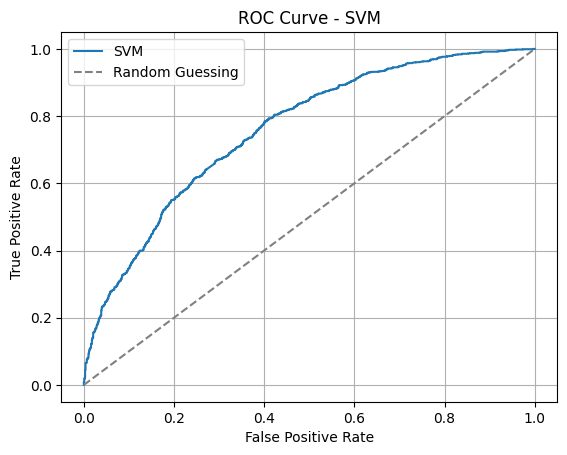

In [ ]:
# Plot the ROC curve for SVM
fpr, tpr, _ = roc_curve(y_test, svm_proba)

plt.plot(fpr, tpr, label='SVM')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.grid(True)
plt.show()

**4.6 Confusion Matrix**

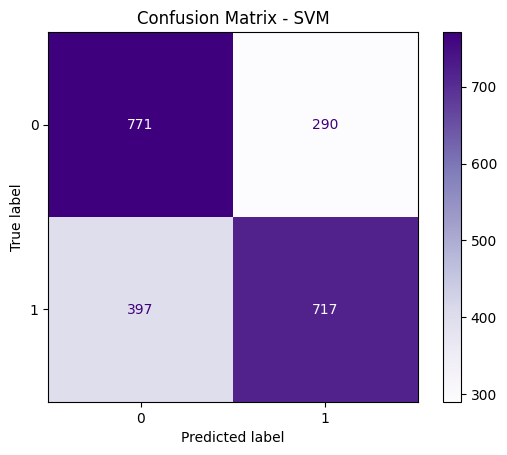

In [ ]:
# Display the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, svm_pred, cmap='Purples')
plt.title("Confusion Matrix - SVM")
plt.grid(False)
plt.show()

**4.7 Classification Report**

In [ ]:
# Show precision, recall, and F1-score for both classes
print("\n Classification Report:\n")
print(classification_report(y_test, svm_pred, target_names=["Team2 Win", "Team1 Win"]))


 Classification Report:

              precision    recall  f1-score   support

   Team2 Win       0.66      0.73      0.69      1061
   Team1 Win       0.71      0.64      0.68      1114

    accuracy                           0.68      2175
   macro avg       0.69      0.69      0.68      2175
weighted avg       0.69      0.68      0.68      2175



**4.8 Precision-Recall Curve**

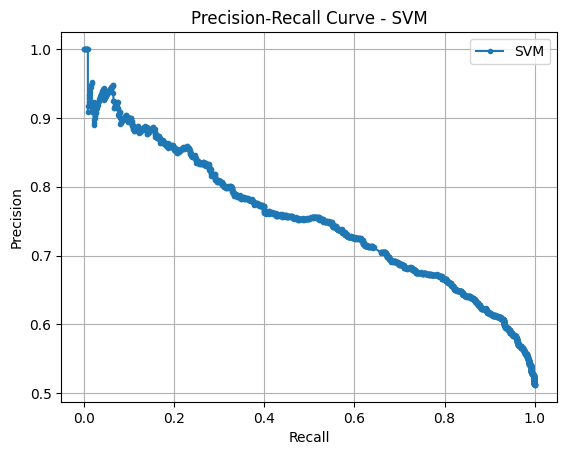

In [ ]:
# Plot the precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, svm_proba)

plt.plot(recall, precision, label='SVM', marker='.')
plt.title("Precision-Recall Curve - SVM")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.legend()
plt.show()

**4.9 Evaluation Metrics Bar Chart**

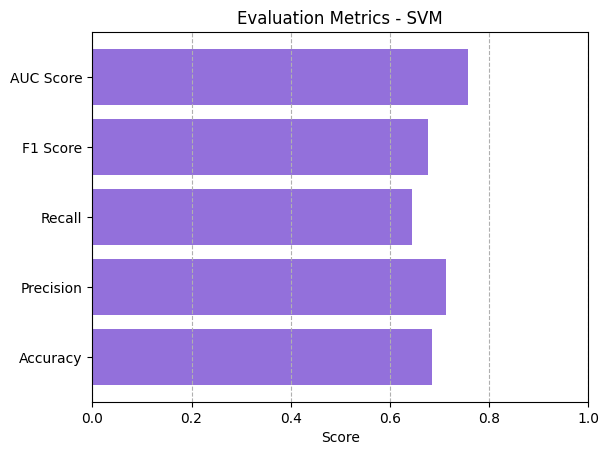

In [ ]:
# Visualize model performance metrics in a bar chart
scores = {
    'Accuracy': accuracy_score(y_test, svm_pred),
    'Precision': precision_score(y_test, svm_pred),
    'Recall': recall_score(y_test, svm_pred),
    'F1 Score': f1_score(y_test, svm_pred),
    'AUC Score': roc_auc_score(y_test, svm_proba)
}

plt.barh(list(scores.keys()), list(scores.values()), color='mediumpurple')
plt.title("Evaluation Metrics - SVM")
plt.xlabel("Score")
plt.xlim(0, 1)
plt.grid(True, axis='x', linestyle='--')
plt.show()

## **Model Comparison, Visualizations, and Summary**

This section presents a consolidated comparison of all four machine learning models used in the project. It includes a visual comparison of evaluation metrics, a tabular ranking based on model accuracy, and a summary identifying the best-performing model. The goal is to draw final insights and recommend the most effective model for predicting cricket match outcomes.

**Model Comparison: Grouped Bar Chart of Evaluation Metrics**

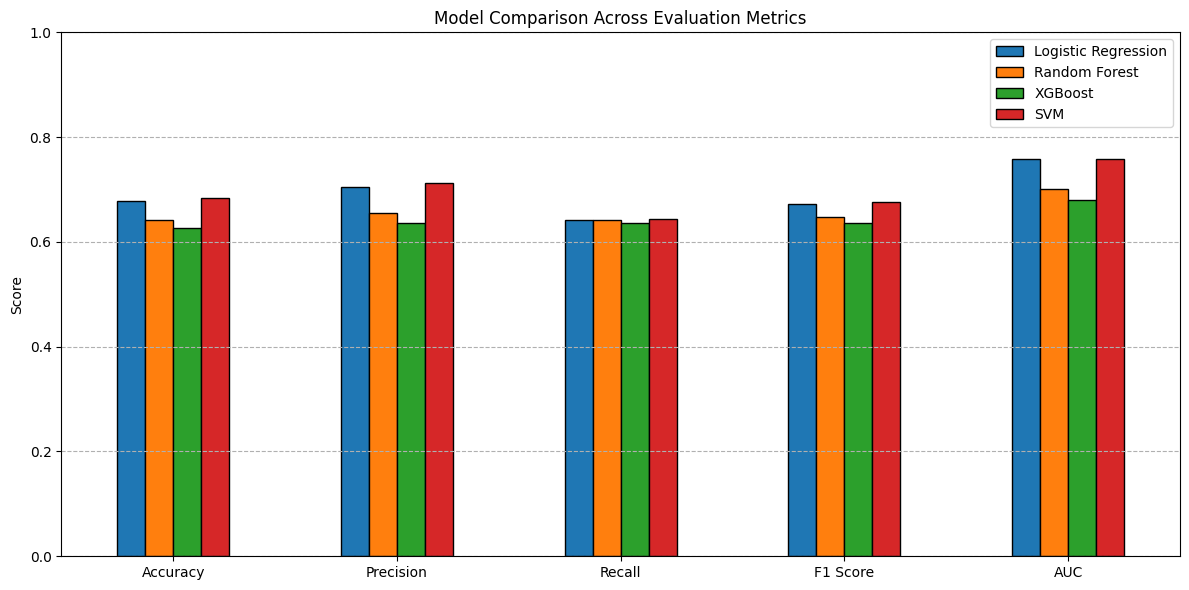

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame to compare performance metrics of all models
comparison_df = pd.DataFrame({
    'Logistic Regression': [log_accuracy, log_precision, log_recall, log_f1, log_auc],
    'Random Forest': [rf_accuracy, rf_precision, rf_recall, rf_f1, rf_auc],
    'XGBoost': [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1, xgb_auc],
    'SVM': [svm_accuracy, svm_precision, svm_recall, svm_f1, svm_auc]
}, index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])

# Plot the grouped bar chart to visualize model performance across key metrics
comparison_df.plot(kind='bar', figsize=(12, 6), edgecolor='black')
plt.title('Model Comparison Across Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

This grouped bar chart visualizes how each model performed across five key evaluation metrics: Accuracy, Precision, Recall, F1 Score, and AUC. Here's a breakdown:

SVM consistently shows strong performance across all metrics and slightly outperforms the other models, particularly in Accuracy, F1 Score, and AUC.

Logistic Regression follows closely behind, maintaining a balanced score across metrics with minimal fluctuation, making it a reliable and interpretable choice.

Random Forest performs reasonably well but lags behind in Precision and AUC compared to SVM and Logistic Regression.

XGBoost, despite its reputation for strong performance on many datasets, performed comparatively lower across all metrics in this case—possibly due to dataset characteristics or hyperparameter settings.

This visual summary helps us quickly spot which model is most robust across multiple metrics, not just Accuracy but giving a more holistic view of performance. Based on this, **Support Vector Machine(SVM)** appears to be the most effective model for predicting cricket match outcomes in this project.

**Sort and Display Model Performance Table**

In [ ]:
# Transpose and sort the DataFrame to see which model is best by accuracy
sorted_df = comparison_df.T.sort_values(by='Accuracy', ascending=False)
display(sorted_df)

,Accuracy,Precision,Recall,F1 Score,AUC
SVM,0.684138,0.712016,0.643627,0.676096,0.758321
Logistic Regression,0.678621,0.704031,0.642729,0.671985,0.757978
Random Forest,0.642759,0.654445,0.640934,0.647619,0.701801
XGBoost,0.627126,0.635874,0.636445,0.636160,0.679986


This table presents a sorted comparison of all four models - SVM, Logistic Regression, Random Forest, and XGBoost, based on their Accuracy scores. Transposing the original comparison DataFrame allows us to align each model as a row and evaluation metric as a column, making it easier to compare performance side by side.

From the sorted table:

**SVM** achieved the **highest accuracy (0.6841)** and also leads in Precision, F1 Score, and AUC, indicating balanced and strong performance.

Logistic Regression closely follows and shows consistent results across all metrics.

Random Forest and XGBoost trail behind, with XGBoost having the lowest scores overall for this dataset.

This sorted view makes it immediately clear which model is the top performer and supports a data-driven justification for model selection.

**Identify the Best Performing Model**

In [ ]:
# Get the model with the highest accuracy
best_model_name = sorted_df.index[0]
best_accuracy = sorted_df.iloc[0]['Accuracy']

print(f"The Best model is: {best_model_name} with Accuracy: {best_accuracy:.4f}")

The Best model is: SVM with Accuracy: 0.6841


This cell programmatically identifies the model with the highest accuracy by extracting the top row from the previously sorted DataFrame. The model name and its corresponding accuracy are then printed in a clean, concise format. In this case, **Support Vector Machine (SVM)** is automatically selected as the best performer based on accuracy, providing a clear conclusion backed by metrics.

## **Exporting Data for PowerBI**

In [ ]:

import numpy as np
import pandas as pd

# Ensure Series/arrays
y_true = pd.Series(y_test).reset_index(drop=True).astype(int)
yhat   = pd.Series(svm_pred).reset_index(drop=True).astype(int)

proba = np.asarray(svm_proba)
# Handle either shape (n,) or (n,2)
if proba.ndim == 2:
    proba1 = proba[:, 1]
elif proba.ndim == 1:
    proba1 = proba
else:
    raise ValueError(f"svm_proba has unexpected shape: {proba.shape}")

proba1 = pd.Series(proba1).reset_index(drop=True)
proba0 = 1.0 - proba1

# Align lengths defensively
m = min(len(y_true), len(yhat), len(proba1))
y_true = y_true.iloc[:m]
yhat   = yhat.iloc[:m]
proba1 = proba1.iloc[:m]
proba0 = proba0.iloc[:m]

# Map class → human-readable label (adjust if your labeling differs)
label_map = {0: "Team2 Win", 1: "Team1 Win"}

df = pd.DataFrame({
    "sample_id": np.arange(m),
    "actual": y_true,
    "actual_label": y_true.map(label_map),
    "svm_pred": yhat,
    "svm_pred_label": yhat.map(label_map),
    "svm_proba_class1": proba1,          # P(class=1) = P(Team1 Win)
    "svm_proba_class0": proba0,          # P(class=0) = P(Team2 Win)
})

# Flag for correctness (use AVERAGE or SUM in Power BI)
df["correct"] = (df["actual"] == df["svm_pred"]).astype(int)

# Ranks for “probability trend” plot (sort by ascending P(class=1))
df["prob_rank_asc"]  = df["svm_proba_class1"].rank(method="first", ascending=True).astype(int)
df["prob_rank_desc"] = df["svm_proba_class1"].rank(method="first", ascending=False).astype(int)

# Save one tidy CSV that supports all visuals
out_path = "svm_powerbi_export.csv"
df.to_csv(out_path, index=False)
print(f"✅ Exported {m} rows to {out_path}")




✅ Exported 2175 rows to svm_powerbi_export.csv


In [ ]:
# df.to_csv("svm_powerbi_export.csv", index=False)

from google.colab import files
files.download("svm_powerbi_export.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ── EXPORT: Logistic, Random Forest, XGBoost → Power BI CSVs ──────────────────
import numpy as np
import pandas as pd

def export_model_powerbi(y_true_in, y_pred_in, proba_in, model_key, model_name, out_path, label_map=None):
    """
    Creates a CSV with:
      sample_id, actual, actual_label,
      <key>_pred, <key>_pred_label,
      <key>_proba_class1, <key>_proba_class0,
      correct, prob_rank_asc, prob_rank_desc, Model
    Works with proba as 1D (P(class=1)) or 2D ([:,1]).
    """
    if label_map is None:
        label_map = {0: "Team2 Win", 1: "Team1 Win"}

    # Coerce inputs
    y_true = pd.Series(y_true_in).reset_index(drop=True).astype(int)
    yhat   = pd.Series(y_pred_in).reset_index(drop=True).astype(int)

    proba = np.asarray(proba_in)
    if proba.ndim == 2:
        p1 = proba[:, 1]
    elif proba.ndim == 1:
        p1 = proba
    else:
        raise ValueError(f"Unexpected proba shape: {proba.shape}")

    p1 = pd.Series(p1).reset_index(drop=True)
    p0 = 1.0 - p1

    # Align lengths defensively
    m = min(len(y_true), len(yhat), len(p1))
    y_true, yhat, p1, p0 = y_true.iloc[:m], yhat.iloc[:m], p1.iloc[:m], p0.iloc[:m]

    df = pd.DataFrame({
        "Model": model_name,
        "sample_id": np.arange(m),
        "actual": y_true,
        "actual_label": y_true.map(label_map),
        f"{model_key}_pred": yhat,
        f"{model_key}_pred_label": yhat.map(label_map),
        f"{model_key}_proba_class1": p1,     # P(class=1) = P(Team1 Win)
        f"{model_key}_proba_class0": p0,     # P(class=0) = P(Team2 Win)
    })

    # Flags & ranks for visuals
    df["correct"] = (df["actual"] == df[f"{model_key}_pred"]).astype(int)
    df["prob_rank_asc"]  = df[f"{model_key}_proba_class1"].rank(method="first", ascending=True).astype(int)
    df["prob_rank_desc"] = df[f"{model_key}_proba_class1"].rank(method="first", ascending=False).astype(int)

    df.to_csv(out_path, index=False)
    print(f"✅ Exported {m} rows for {model_name} to {out_path}")
    return df

# Logistic Regression (uses: y_pred, y_proba)
df_log = export_model_powerbi(
    y_true_in=y_test, y_pred_in=y_pred, proba_in=y_proba,
    model_key="log", model_name="Logistic Regression",
    out_path="logistic_powerbi_export.csv"
)

# Random Forest (uses: rf_pred, rf_proba)
df_rf = export_model_powerbi(
    y_true_in=y_test, y_pred_in=rf_pred, proba_in=rf_proba,
    model_key="rf", model_name="Random Forest",
    out_path="rf_powerbi_export.csv"
)

# XGBoost (uses: xgb_pred, xgb_proba)
df_xgb = export_model_powerbi(
    y_true_in=y_test, y_pred_in=xgb_pred, proba_in=xgb_proba,
    model_key="xgb", model_name="XGBoost",
    out_path="xgb_powerbi_export.csv"
)

# OPTIONAL: combined file for cross-model visuals in one import
all_models_df = pd.concat([df_log, df_rf, df_xgb], ignore_index=True)
all_models_df.to_csv("models_powerbi_export.csv", index=False)
print("📦 Also saved combined file: models_powerbi_export.csv")

"""
Power BI usage (same as SVM):
• Confusion matrix: Matrix visual → Rows=actual_label, Columns=<key>_pred_label, Values=Count.
• Accuracy by team: Column chart → Axis=actual_label, Values=Average(correct).
• Probability trend: Line chart → X=prob_rank_asc, Y=Average(<key>_proba_class1).
• Probability distribution: Create bins on <key>_proba_class1, plot Count by bin.
• Cards/DAX:
   - Accuracy = AVERAGE(correct)
   - Total Match = SUM(correct)
   - Avg Probability = AVERAGE(<key>_proba_class1)
   - Precision/Recall from TP/FP/FN derived from actual vs <key>_pred
"""


✅ Exported 2175 rows for Logistic Regression to logistic_powerbi_export.csv
✅ Exported 2175 rows for Random Forest to rf_powerbi_export.csv
✅ Exported 2175 rows for XGBoost to xgb_powerbi_export.csv
📦 Also saved combined file: models_powerbi_export.csv


'\nPower BI usage (same as SVM):\n• Confusion matrix: Matrix visual → Rows=actual_label, Columns=<key>_pred_label, Values=Count.\n• Accuracy by team: Column chart → Axis=actual_label, Values=Average(correct).\n• Probability trend: Line chart → X=prob_rank_asc, Y=Average(<key>_proba_class1).\n• Probability distribution: Create bins on <key>_proba_class1, plot Count by bin.\n• Cards/DAX:\n   - Accuracy = AVERAGE(correct)\n   - Total Match = SUM(correct)\n   - Avg Probability = AVERAGE(<key>_proba_class1)\n   - Precision/Recall from TP/FP/FN derived from actual vs <key>_pred\n'

In [ ]:


from google.colab import files

for f in [
    "logistic_powerbi_export.csv",
    "rf_powerbi_export.csv",
    "xgb_powerbi_export.csv",
    "models_powerbi_export.csv",
]:
    files.download(f)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Saving SVM Pipeline for Flask API**

In [ ]:
from sklearn.svm import SVC
svm = SVC(probability=True, random_state=42)  # probability=True is required for predict_proba


In [ ]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# 1) Ensure X_train is a DataFrame with column names
# If you currently have a NumPy array, wrap it like:
# X_train = pd.DataFrame(X_train, columns=[...your column names...])

num_sel = make_column_selector(dtype_include=np.number)
cat_sel = make_column_selector(dtype_exclude=np.number)

pre = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_sel),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_sel),
    ]
)

svm = SVC(probability=True, random_state=42)

svm_pipe = Pipeline(steps=[("pre", pre), ("model", svm)])
svm_pipe.fit(X_train, y_train)  # this should run without the column error


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f83d42d9880>),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f83d01c1130>)])),
                ('model', SVC(probability=True, random_state=42))])

In [ ]:
svm_pipe = Pipeline(steps=[("pre", pre), ("model", svm)])
svm_pipe.fit(X_train, y_train)


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f83d42d9880>),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f83d01c1130>)])),
                ('model', SVC(probability=True, random_state=42))])

In [ ]:
from joblib import dump
dump(svm_pipe, "svm.pkl")


['svm.pkl']

In [ ]:
import json

feature_names = X_train.columns.tolist()
with open("feature_names.json", "w") as f:
    json.dump(feature_names, f, indent=2)

feature_dtypes = {c: str(X_train.dtypes[c]) for c in X_train.columns}
with open("feature_dtypes.json", "w") as f:
    json.dump(feature_dtypes, f, indent=2)


In [ ]:
from google.colab import files
files.download("svm.pkl")
files.download("feature_names.json")
files.download("feature_dtypes.json")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>